In [78]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [100]:
img = cv2.imread("ss.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [101]:
img.shape

(768, 1366, 3)

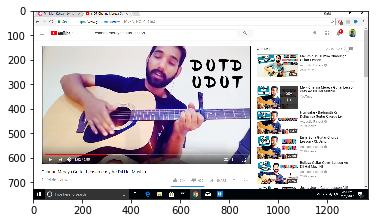

In [102]:
plt.imshow(img)
plt.show()

In [42]:
img =cv2.resize(img, (500,330))    

In [43]:
img.shape

(330, 500, 3)

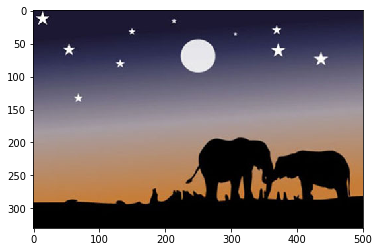

In [44]:
plt.imshow(img)

In [45]:
img_reshape = img.reshape((-1,3))

In [46]:
img_reshape.shape

(165000, 3)

In [47]:
from sklearn.cluster import KMeans

In [48]:
n_clusters = 3
kmeans = KMeans(n_clusters)

In [49]:
kmeans.fit(img_reshape)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
centers = kmeans.cluster_centers_

In [51]:
centers = np.round(centers)

In [52]:
centers

array([[171., 143., 129.],
       [ 14.,  12.,  23.],
       [ 78.,  76., 103.]])

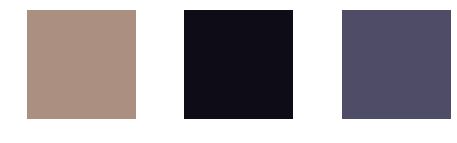

In [53]:
c= 1
plt.figure(0,figsize=(8,2))

for color in centers:
    
    plt.subplot(1,n_clusters,c)
    plt.axis("off")
    c+=1
    
    plot  = np.zeros((100,100,3))
    
    plot[:,:,:] = color
    
    plot = np.array(plot, dtype="int")
    plt.imshow(plot)
    
plt.show()

In [54]:
extracted_img = np.zeros((img.shape[0]*img.shape[1],3), dtype="int")

In [55]:
centers

array([[171., 143., 129.],
       [ 14.,  12.,  23.],
       [ 78.,  76., 103.]])

In [56]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
for i in range(extracted_img.shape[0]):
    extracted_img[i] = centers[kmeans.labels_[i]]

In [58]:
extracted_img.shape

(165000, 3)

In [59]:
extracted_img = extracted_img.reshape((img.shape[0],img.shape[1],3))

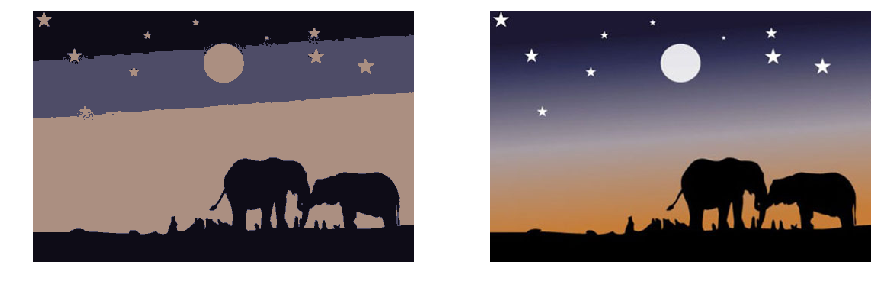

In [89]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.imshow(extracted_img)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img)
plt.axis("off")
plt.show()

In [106]:
from scipy.misc import toimage
ex =toimage(extracted_img)
ex.save("book/extracted.jpg")

C:\Users\Mohit Uniyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  
